<a href="https://colab.research.google.com/github/sames12421/Overfiting_-_Underfitting/blob/main/overfitting_underfitting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow  as tf # framework
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0, x_test/255.0 #normalizing input values

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train,x_val=x_train[:50000],x_train[50000:]
ytrain,y_val=y_train[:50000],y_train[50000:] #split training data into training and validation

In [ ]:
#underfitting model
def build_underfit_model():
  model=Sequential([
      Flatten(input_shape=(28,28)), #
      Dense(100,activation='relu'),  #
      Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #changed loss function name to sparse_categorical_crossentropy
  return model
underfit_model=build_underfit_model()
history_underfit=underfit_model.fit(x_train,ytrain,epochs=10,validation_data=(x_val,y_val)) #changed y_train to ytrain since ytrain contains 50000 samples.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8608 - loss: 0.4868 - val_accuracy: 0.9542 - val_loss: 0.1632
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9569 - loss: 0.1431 - val_accuracy: 0.9677 - val_loss: 0.1167
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9709 - loss: 0.0975 - val_accuracy: 0.9722 - val_loss: 0.0953
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9788 - loss: 0.0698 - val_accuracy: 0.9728 - val_loss: 0.0926
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9732 - val_loss: 0.0893
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9879 - loss: 0.0411 - val_accuracy: 0.9749 - val_loss: 0.0877
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9738 - val_loss: 0.0865
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9925 - loss: 0.026

In [ ]:
#overfitting model
def build_overfit_model():
  model=Sequential([
      Flatten(input_shape=(28,28)),
      Dense(512,activation='relu'), #more neuron
      Dropout(0.5), #dropout to reduce overfitting
      Dense(256,activation='relu'),
      Dropout(0.5),
      Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model
overfit_model=build_overfit_model()
history_overfit=overfit_model.fit(x_train,ytrain,epochs=20,validation_data=(x_val,y_val)) # Changed y_train to ytrain

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8130 - loss: 0.5795 - val_accuracy: 0.9649 - val_loss: 0.1212
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9415 - loss: 0.1950 - val_accuracy: 0.9678 - val_loss: 0.1024
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.9546 - loss: 0.1548 - val_accuracy: 0.9730 - val_loss: 0.0928
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9605 - loss: 0.1334 - val_accuracy: 0.9758 - val_loss: 0.0818
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9622 - loss: 0.1223 - val_accuracy: 0.9774 - val_loss: 0.0815
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9684 - loss: 0.1104 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9684 - loss: 0.1043 - val_accuracy: 0.9790 - val_loss: 0.0839
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9711 -

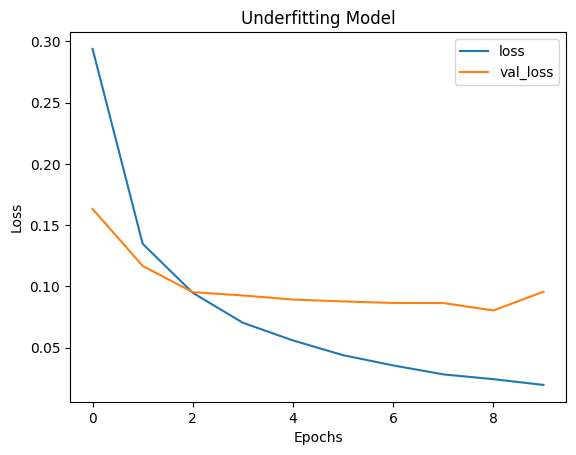

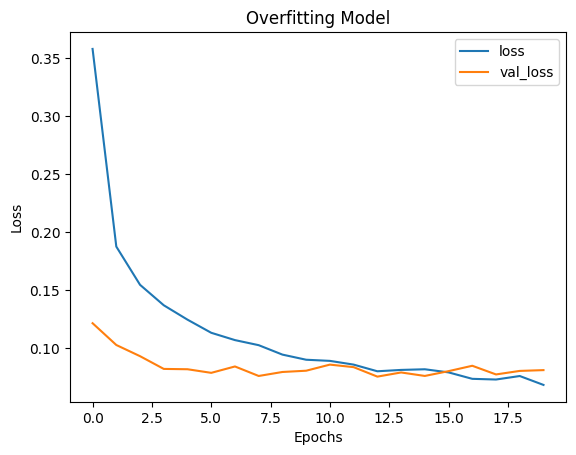

In [ ]:
#visulization for underfitting model
def plot_history(history,title):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(title)
  plt.legend()
  plt.show()
# Calling the correct function 'plot_history' instead of 'plot_loss'
plot_history(history_underfit,'Underfitting Model') # Changed 'plot_loss' to 'plot_history'
plot_history(history_overfit,'Overfitting Model') # Changed 'plot_loss' to 'plot_history'